In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Holiday Season HackerEarth/14feeca248c811eb.zip' -d '/content/'

In [4]:
data_dir = '/content/dataset'
TARGET_SIZE = ( 299, 299 )
BATCH_SIZE = 32
data_frame = pd.read_csv( os.path.join( data_dir, 'train.csv') )

In [5]:
data_frame.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [6]:
data_frame.describe()

,Image,Class
count,6469,6469
unique,6469,6
top,image3291.jpg,Miscellaneous
freq,1,2801


In [7]:
data_frame.isnull().sum()

Image    0
Class    0
dtype: int64

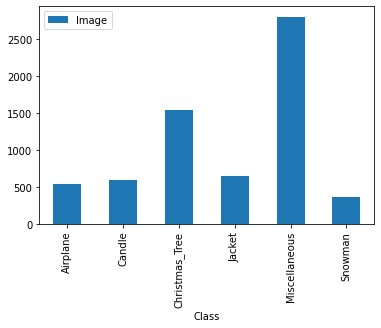

In [8]:
data_frame.groupby( ['Class'] ).count().plot.bar()

In [9]:
Y = data_frame[['Class']].copy()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, StratifiedKFold

In [11]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [24]:
def create_new_model():
    inputs = tf.keras.Input( shape = ( TARGET_SIZE[0], TARGET_SIZE[1], 3 ) )
    base_model = Xception( include_top = False, pooling = 'avg', input_tensor = inputs )
    for layers in base_model.layers:
        layers.trainable = False
    x = base_model( base_model.inputs, training = False )
    x = Dense( 512, activation = 'relu' )( x )
    x = Dropout( 0.5 )( x )
    x = Dense( 256, activation = 'relu' )( x )
    outputs = Dense( 6, activation = 'softmax' )( x )

    return keras.Model( inputs, outputs )

In [25]:
skf = StratifiedKFold( n_splits = 5, shuffle = True, random_state = 42 )

In [26]:
def plot_metrics( history ):
    
    # Plotting accuracy history
    plt.figure( figsize= (5,5 ) )
    plt.plot( history.history['accuracy'] )
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy Tracker', fontsize=15)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.legend(['training', 'validation'])
    plt.show()
    
    # Plotting accuracy history
    plt.figure( figsize= (5,5 ) )
    plt.plot( history.history['loss'] )
    plt.plot(history.history['val_loss'])
    plt.title('Loss Tracker', fontsize=15)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(['Training', 'Validation'])
    plt.show()


In [27]:
train_datagen = ImageDataGenerator( horizontal_flip = True, 
                             fill_mode = 'nearest',
                             zoom_range = 0.4,
                             shear_range = 0.4,
                             preprocessing_function = preprocess_input
                             )
val_datagen = ImageDataGenerator( preprocessing_function = preprocess_input )

fold_var = 1

val_accuracy = list()
val_loss = list()
data = dict()

Found 5175 validated image filenames belonging to 6 classes.
Found 1294 validated image filenames belonging to 6 classes.
Epoch 1/5
162/162 [==============================] - 123s 702ms/step - loss: 1.5261 - accuracy: 0.6427 - val_loss: 0.4114 - val_accuracy: 0.8578

Epoch 00001: val_accuracy improved from -inf to 0.85781, saving model to /content/dataset/model_1.h5
Epoch 2/5
162/162 [==============================] - 113s 699ms/step - loss: 0.6188 - accuracy: 0.8042 - val_loss: 0.4401 - val_accuracy: 0.8725

Epoch 00002: val_accuracy improved from 0.85781 to 0.87249, saving model to /content/dataset/model_1.h5
Epoch 3/5
162/162 [==============================] - 113s 699ms/step - loss: 0.6105 - accuracy: 0.8068 - val_loss: 0.3729 - val_accuracy: 0.8872

Epoch 00003: val_accuracy improved from 0.87249 to 0.88717, saving model to /content/dataset/model_1.h5
Epoch 4/5
162/162 [==============================] - 113s 695ms/step - loss: 0.5684 - accuracy: 0.8161 - val_loss: 0.4173 - val_acc

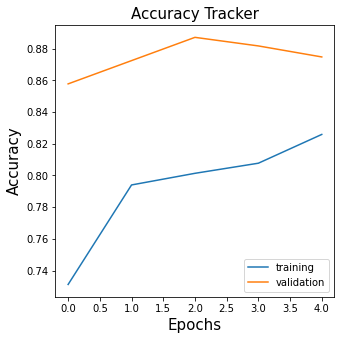

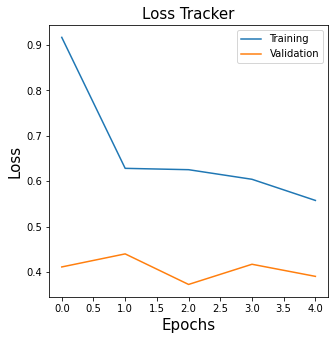

41/41 [==============================] - 12s 280ms/step - loss: 0.3729 - accuracy: 0.8872
Found 5175 validated image filenames belonging to 6 classes.
Found 1294 validated image filenames belonging to 6 classes.
Epoch 1/5
162/162 [==============================] - 116s 701ms/step - loss: 1.5905 - accuracy: 0.6294 - val_loss: 0.5353 - val_accuracy: 0.8369

Epoch 00001: val_accuracy improved from -inf to 0.83694, saving model to /content/dataset/model_2.h5
Epoch 2/5
162/162 [==============================] - 113s 697ms/step - loss: 0.6427 - accuracy: 0.7932 - val_loss: 0.4061 - val_accuracy: 0.8524

Epoch 00002: val_accuracy improved from 0.83694 to 0.85240, saving model to /content/dataset/model_2.h5
Epoch 3/5
162/162 [==============================] - 113s 697ms/step - loss: 0.6038 - accuracy: 0.7950 - val_loss: 0.4762 - val_accuracy: 0.8184

Epoch 00003: val_accuracy did not improve from 0.85240
Epoch 4/5
162/162 [==============================] - 113s 697ms/step - loss: 0.6439 - accu

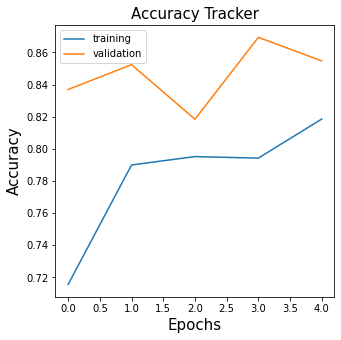

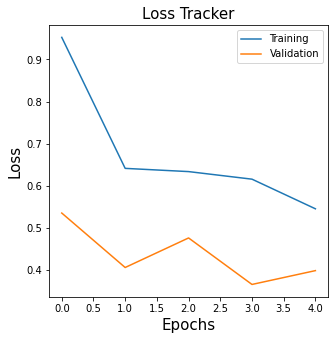

41/41 [==============================] - 12s 280ms/step - loss: 0.3659 - accuracy: 0.8694
Found 5175 validated image filenames belonging to 6 classes.
Found 1294 validated image filenames belonging to 6 classes.
Epoch 1/5
162/162 [==============================] - 116s 703ms/step - loss: 1.6728 - accuracy: 0.6470 - val_loss: 0.3635 - val_accuracy: 0.8794

Epoch 00001: val_accuracy improved from -inf to 0.87944, saving model to /content/dataset/model_3.h5
Epoch 2/5
162/162 [==============================] - 113s 698ms/step - loss: 0.6590 - accuracy: 0.7855 - val_loss: 0.4199 - val_accuracy: 0.8632

Epoch 00002: val_accuracy did not improve from 0.87944
Epoch 3/5
162/162 [==============================] - 113s 698ms/step - loss: 0.6147 - accuracy: 0.8093 - val_loss: 0.4674 - val_accuracy: 0.8454

Epoch 00003: val_accuracy did not improve from 0.87944
Epoch 4/5
162/162 [==============================] - 113s 699ms/step - loss: 0.5900 - accuracy: 0.8098 - val_loss: 0.3789 - val_accuracy: 0

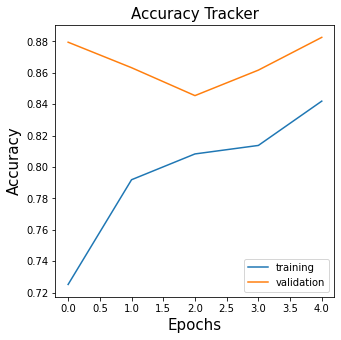

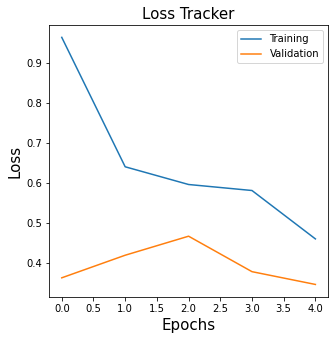

41/41 [==============================] - 11s 278ms/step - loss: 0.3469 - accuracy: 0.8825
Found 5175 validated image filenames belonging to 6 classes.
Found 1294 validated image filenames belonging to 6 classes.
Epoch 1/5
162/162 [==============================] - 116s 699ms/step - loss: 1.6271 - accuracy: 0.6285 - val_loss: 0.4131 - val_accuracy: 0.8586

Epoch 00001: val_accuracy improved from -inf to 0.85858, saving model to /content/dataset/model_4.h5
Epoch 2/5
162/162 [==============================] - 113s 698ms/step - loss: 0.6419 - accuracy: 0.7927 - val_loss: 0.4418 - val_accuracy: 0.8509

Epoch 00002: val_accuracy did not improve from 0.85858
Epoch 3/5
162/162 [==============================] - 113s 697ms/step - loss: 0.6353 - accuracy: 0.7856 - val_loss: 0.4006 - val_accuracy: 0.8563

Epoch 00003: val_accuracy did not improve from 0.85858
Epoch 4/5
162/162 [==============================] - 113s 698ms/step - loss: 0.5927 - accuracy: 0.8055 - val_loss: 0.3891 - val_accuracy: 0

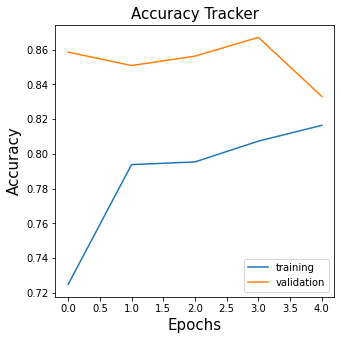

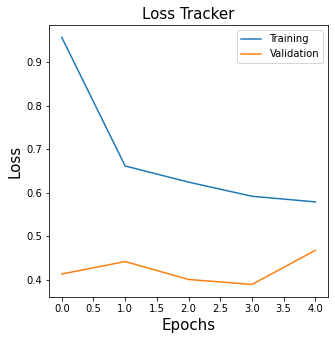

41/41 [==============================] - 12s 281ms/step - loss: 0.3891 - accuracy: 0.8671
Found 5176 validated image filenames belonging to 6 classes.
Found 1293 validated image filenames belonging to 6 classes.
Epoch 1/5
162/162 [==============================] - 117s 706ms/step - loss: 2.4899 - accuracy: 0.5940 - val_loss: 0.5940 - val_accuracy: 0.8051

Epoch 00001: val_accuracy improved from -inf to 0.80510, saving model to /content/dataset/model_5.h5
Epoch 2/5
162/162 [==============================] - 114s 701ms/step - loss: 0.6641 - accuracy: 0.7727 - val_loss: 0.4640 - val_accuracy: 0.8329

Epoch 00002: val_accuracy improved from 0.80510 to 0.83295, saving model to /content/dataset/model_5.h5
Epoch 3/5
162/162 [==============================] - 113s 699ms/step - loss: 0.6007 - accuracy: 0.8059 - val_loss: 0.4380 - val_accuracy: 0.8654

Epoch 00003: val_accuracy improved from 0.83295 to 0.86543, saving model to /content/dataset/model_5.h5
Epoch 4/5
162/162 [======================

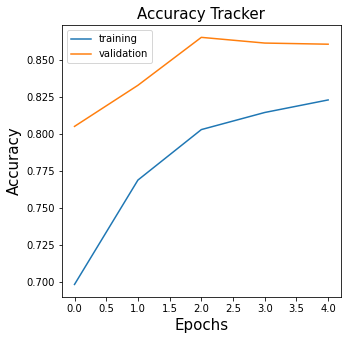

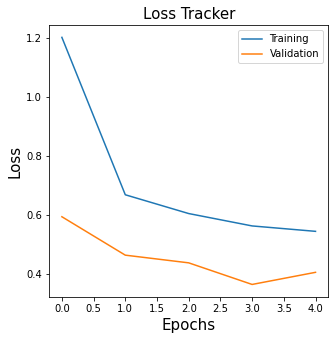

41/41 [==============================] - 12s 281ms/step - loss: 0.4380 - accuracy: 0.8654


In [28]:
for train_idx, val_idx in skf.split( np.zeros( Y.shape[0] ), Y ):
    
    train_df = data_frame.iloc[train_idx]
    val_df = data_frame.iloc[val_idx]
    
    train_data = train_datagen.flow_from_dataframe( dataframe = train_df, directory = os.path.join( data_dir, 'train/' ), x_col = "Image", y_col = "Class", target_size = TARGET_SIZE, class_mode = "categorical", shuffle = True, batch_size = BATCH_SIZE, seed = 42 )
    val_data = val_datagen.flow_from_dataframe( dataframe = val_df, directory = os.path.join( data_dir, 'train/' ), x_col = "Image", y_col = "Class", target_size = TARGET_SIZE, class_mode = "categorical", shuffle = True, batch_size = BATCH_SIZE, seed = 42 )
    
    
    mc = ModelCheckpoint( os.path.join( data_dir, get_model_name( fold_var ) ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
    reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )

    model = create_new_model()

    opt = keras.optimizers.Adam( learning_rate = 1e-2 )
    model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
    history = model.fit( train_data, validation_data = val_data, epochs = 5, callbacks = [ mc, reduce_lr ], steps_per_epoch = train_data.__len__() )

    plot_metrics( history )
    model.load_weights( os.path.join( data_dir, get_model_name( fold_var ) ) )
    results = model.evaluate( val_data )
    results = dict( zip( model.metrics_names, results ) )
    
    data[fold_var] = [ train_data, val_data ]
    
    val_accuracy.append( results['accuracy'] )
    val_loss.append( results['loss'] )
    fold_var += 1
    tf.keras.backend.clear_session()

In [ ]:
print( val_accuracy )
idx = val_accuracy.index( max( val_accuracy ) ) + 1
model = create_new_model()
model.load_weights( os.path.join( data_dir, get_model_name( idx ) ) )
# print( model.summary() )
# for layers in model.layers[1].layers[126:]:
#     layers.trainable = True
# print( model.summary() )
opt = keras.optimizers.Adam( learning_rate = 1e-2 )
model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
mc = ModelCheckpoint( os.path.join( data_dir, 'best.h5' ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )
history = model.fit( data[idx][0], validation_data = data[idx][1], epochs = 10, callbacks = [ mc, reduce_lr ], steps_per_epoch = data[idx][0].__len__() )

[0.8871715664863586, 0.8693972229957581, 0.8825348019599915, 0.8670788407325745, 0.8654292225837708]
Epoch 1/10
142/162 [=========================>....] - ETA: 12s - loss: 0.6083 - accuracy: 0.8155

In [ ]:
print( model.summary() )
for layers in model.layers[1].layers:
    layers.trainable = False
print( model.summary() )
opt = keras.optimizers.Adam( learning_rate = 1e-2 )
model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
mc = ModelCheckpoint( os.path.join( data_dir, 'best.h5' ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )
history = model.fit( data[idx][0], validation_data = data[idx][1], epochs = 20, callbacks = [ mc, reduce_lr ], steps_per_epoch = data[idx][0].__len__() )

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 20,927,246
Trainable params: 4,814,566
Non-trainable params: 16,112,680
_________________________________________________________________
None
Model: "model"
_________________________________________________________________
Layer (type)         

KeyboardInterrupt: ignored

In [ ]:
print( val_accuracy )
idx = val_accuracy.index( max( val_accuracy ) ) + 1
model = create_new_model()
model.load_weights( '/content/dataset/best.h5' )
print( model.summary() )
for layers in model.layers[1].layers[126:]:
    layers.trainable = True
print( model.summary() )
opt = keras.optimizers.Adam( learning_rate = 1e-5 )
model.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
mc = ModelCheckpoint( os.path.join( data_dir, 'best_2.h5' ), monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True )
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1 )
history = model.fit( data[idx][0], validation_data = data[idx][1], epochs = 10, callbacks = [ mc, reduce_lr ], steps_per_epoch = data[idx][0].__len__() )

In [ ]:
from distutils.dir_util import copy_tree
copy_tree( data_dir + '/test', data_dir + '/test_2/test' ) 

In [ ]:
test_datagen = ImageDataGenerator( 
    preprocessing_function = preprocess_input )

test_data = test_datagen.flow_from_directory( 
    data_dir + '/test_2', 
    target_size = TARGET_SIZE, 
    color_mode = 'rgb', 
    shuffle = False, 
    batch_size = BATCH_SIZE,
    seed = 42 )

Found 3489 images belonging to 1 classes.


In [ ]:
pred = model.predict( test_data , steps = test_data.__len__(), verbose = 1 )
predicted_class_indices = np.argmax( pred, axis = 1 )
labels = ( train_data.class_indices )
labels = dict((v,k) for k,v in labels.items() )
predictions = [labels[k] for k in predicted_class_indices]

55/55 [==============================] - 13s 225ms/step


In [ ]:
filenames = test_data.filenames
filenames = [ filenames[i].split('/')[1] for i in range( 0, len( filenames ) ) ]
results = pd.DataFrame( { "Image":filenames, "Class":predictions } )
results.to_csv( data_dir + '/results.csv', index = False )